<a href="https://colab.research.google.com/drive/1PbEidiqexlWWYB0LjId8Bd2eWQ4cYCui?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn.datasets
from matplotlib import pyplot as plt
import time
from IPython import display

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1 - x)

def activation(x):
    return np.where( x > 0 , 1, 0)

def perceptron(w, x):
    return activation(np.dot(x, w))

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

# Homework

Can you make a perfect classifier? Let's consider the next dataset:

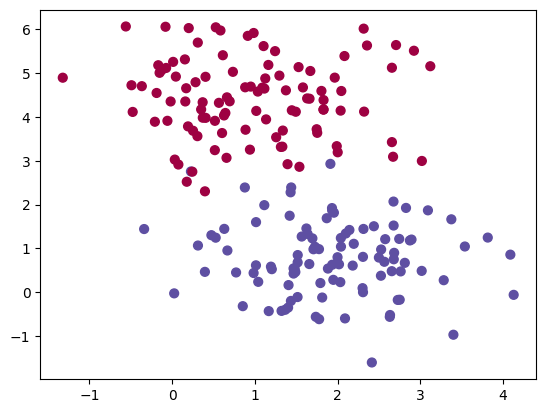

In [ ]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# 1. Try to tune the learning rate and number of iterations

What is the lowest error with the current approach?

Add early stopping to find the optimal number of iterations automatically.

Visualize the decision boundary

'Error: 0.11, LR: 1.0, Itearation: 49'

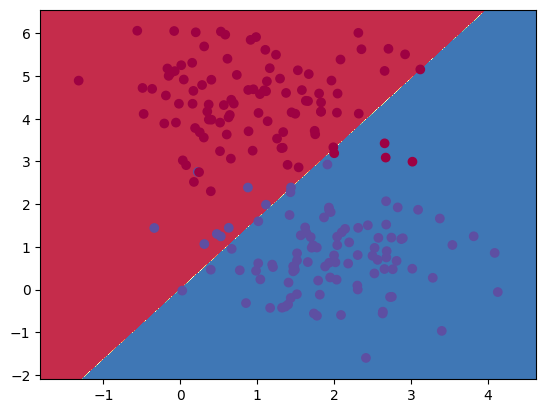

In [ ]:
# w = np.random.rand(X.shape[1])
best_error = float('inf')
best_w = None

best_error = float('inf')
best_iteration = 0
best_w = None

# learning_rates = [0.01, 0.1, 0.5, 1]
learning_rates = np.arange(0.1, 1.1, 0.1)
early_stopping_rounds = 50

for LR in learning_rates:
  w = 2*np.random.random((2,)) - 1
  no_improvement_count = 0

  for j in range(1000):
      # get preds
      pred = perceptron(w, X)

      # how much did we miss?
      diff = y - pred
      error = np.mean(np.abs(diff))


      if error < best_error:
        best_error = error
        best_iteration = j
        best_w = w.copy()
        no_improvement_count = 0
      else:
        no_improvement_count += 1

      if no_improvement_count >= early_stopping_rounds:
        break

      # draw result
      display.clear_output(wait=True)
      # plot_decision_boundary(lambda x: perceptron(w, x))
      # time.sleep(0.1)
      # display.display(f'Error: {error}, LR: {LR}, Itearation: {j}')
      w = w + LR * np.dot(X.T, diff)

display.display(f'Error: {error}, LR: {LR}, Itearation: {j}')
plot_decision_boundary(lambda x: perceptron(best_w, x))

# Answer:

The lowest error is '0.065' for learning rate '1'



---



# 2. It's time to add learnable bias

What is the lowest error now?

Visualize the decision boundary

In [ ]:
def perceptron(w, x, bias):
    return activation(np.dot(x, w) + bias)

'Error: 0.025, LR: 1.0, Itearation: 49'

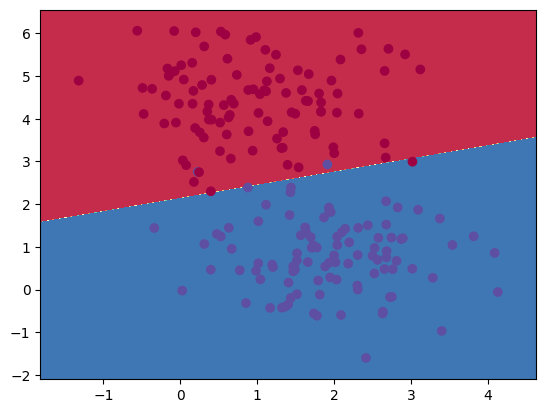

In [ ]:
best_error = float('inf')
best_iteration = 0
best_w = None
best_bias = None

# learning_rates = [0.01, 0.1, 0.5, 1]
learning_rates = np.arange(0.1, 1.1, 0.1)
early_stopping_rounds = 50

for LR in learning_rates:
  w = 2*np.random.random((2,)) - 1
  bias = np.random.rand(1)
  no_improvement_count = 0

  for j in range(1000):
      # get preds
      pred = perceptron(w, X, bias)

      # how much did we miss?
      diff = y - pred
      error = np.mean(np.abs(diff))

      if error < best_error:
        best_error = error
        best_iteration = j
        best_w = w.copy()
        best_bias = bias.copy()
        no_improvement_count = 0
      else:
        no_improvement_count += 1

      if no_improvement_count >= early_stopping_rounds:
        break

      # draw result
      display.clear_output(wait=True)
      # plot_decision_boundary(lambda x: perceptron(w, x))
      # time.sleep(0.1)
      # display.display(f'Error: {error}, LR: {LR}, Itearation: {j}')
      w = w + LR * np.dot(X.T, diff)
      bias = bias + LR * np.sum(diff)

display.display(f'Error: {error}, LR: {LR}, Itearation: {j}')
plot_decision_boundary(lambda x: perceptron(best_w, x, best_bias))

# Answer:

The error is significantly lower with bias

> Error: **0.025**, LR: 1.0, Itearation: 49



# 3*. Let's expand it for three classes



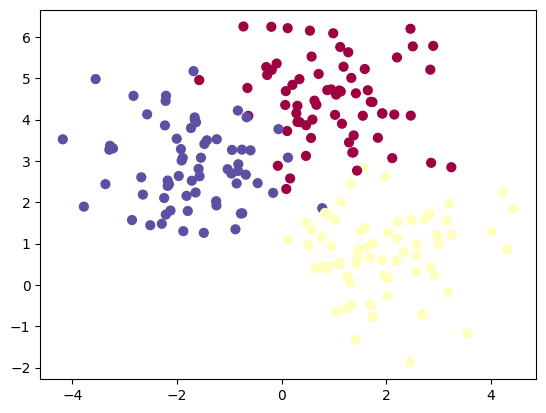

In [ ]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [ ]:
def activation(x):
  return np.argmax(x, axis=1)

def perceptron(w, x, bias):
  return activation(np.dot(x, w) + bias)

In [ ]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [ ]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]


    Z = pred_func(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
    plt.show()

'Error: 0.03666666666666667, LR: 1.0, Itearation: 49'

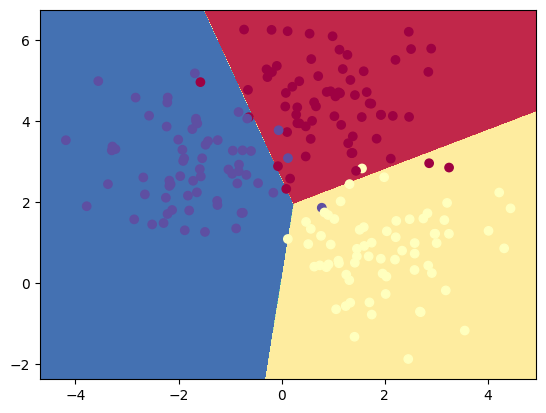

In [ ]:
np.random.seed(0)
X, y = sklearn.datasets.make_blobs(200, centers=3)
X = np.c_[np.ones(X.shape[0]), X]  # Add bias term

num_classes = 3
y_one_hot = one_hot_encode(y, num_classes)


best_error = float('inf')
best_w = None
best_bias = None
best_iteration = 0

learning_rates = np.arange(0.1, 1.1, 0.1)
early_stopping_rounds = 50

for LR in learning_rates:
    w = 2 * np.random.random((X.shape[1], num_classes)) - 1
    bias = np.random.rand(1, num_classes)
    no_improvement_count = 0

    for j in range(1000):
        pred = perceptron(w, X, bias)
        pred_one_hot = one_hot_encode(pred, num_classes)
        diff = y_one_hot - pred_one_hot
        error = np.mean(np.abs(diff))

        if error < best_error:
            best_error = error
            best_iteration = j
            best_w = w.copy()
            best_bias = bias.copy()
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= early_stopping_rounds:
            break

        display.clear_output(wait=True)
        # display.display(f'Error: {error}, LR: {LR}, Iteration: {j}')
        # plot_decision_boundary(lambda x: perceptron(w, x, bias))
        # time.sleep(0.1)

        w = w + LR * np.dot(X.T, diff)
        bias = bias + LR * np.sum(diff, axis=0)

display.display(f'Error: {error}, LR: {LR}, Itearation: {j}')
plot_decision_boundary(lambda x: perceptron(best_w, x, best_bias))